Import Dataset and Preprocess

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories= ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.data)
X_test = vectorizer.transform(test.data)
y_train = train.target
y_test = test.target



KeyboardInterrupt: 

Next, build and evaluate the models:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [LinearSVC(), MultinomialNB(), KNeighborsClassifier(), RandomForestClassifier(max_depth=20), AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(max_depth=4))]
classifier_labels = ['Support Vector Machine', 'Naive Bayes', 'K-Nearest Neighbors', 'Random Forest', 'AdaBoost']
accuracies = np.zeros(5)

index = 0
for model in classifiers:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[index] = accuracy_score(y_true=y_test, y_pred=y_pred)
    print('%s Accuracy %.4f' % (classifier_labels[index], accuracies[index]))
    index += 1


Support Vector Machine Accuracy 0.9524
Naive Bayes Accuracy 0.9049
K-Nearest Neighbors Accuracy 0.8783
Random Forest Accuracy 0.8734
AdaBoost Accuracy 0.8252


While I let the first three classifiers use default parameters, I did adjust the ensemble classifiers slightly. For Random Forest, I imposed a max depth of 20, which reduced computation time for minimal impact on the test accuracy. For AdaBoost, the default classifier is a decision tree of max depth 1, so I adjusted it to have a max depth of 4, which improved the accuracy somewhat without significantly increasing training time. However, it is clear that, under these parameters, a support vector machine performed best on this dataset.

## P3-2. Recognizing hand-written digits

Develop a multi-layer perceptron to recognize handwritten digits

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(64, 32))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred)
print('MLP Accuracy %.4f' % (accuracy_mlp))



MLP Accuracy 0.9588


Since the data was images of size 8x8, I decided to make my MLP with a two hidden layers of sizes 64 and 32. This is yielding an accuracy of just under 97%.

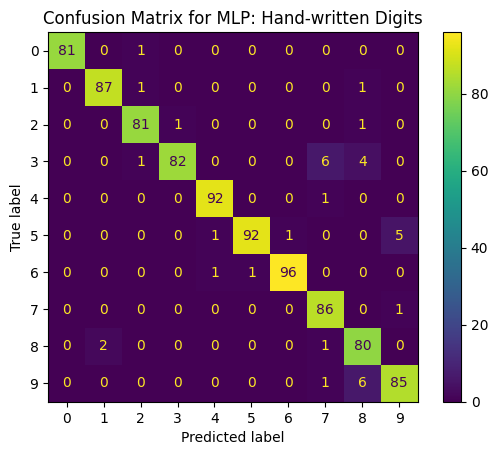

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=digits.target_names)
display.plot()
plt.title("Confusion Matrix for MLP: Hand-written Digits")
plt.show()

The results of this classifier is fairly similar to the support vector classifier in the provided link. They both seem to struggle most with 1's, 2's, and 8's, but are fairly good at classifying 4's, 5's, and 6's